<a href="https://colab.research.google.com/github/Valtern/PCVK_Ganjil_2025/blob/main/week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import google.colab.drive

google.colab.drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from skimage import io
import os
import glob
from google.colab.patches import cv2_imshow
from PIL import Image as im

Mounted at /content/drive


# Part A

1. Tampilkan histogram tiap citra dan analisis distribusi intensitasnya

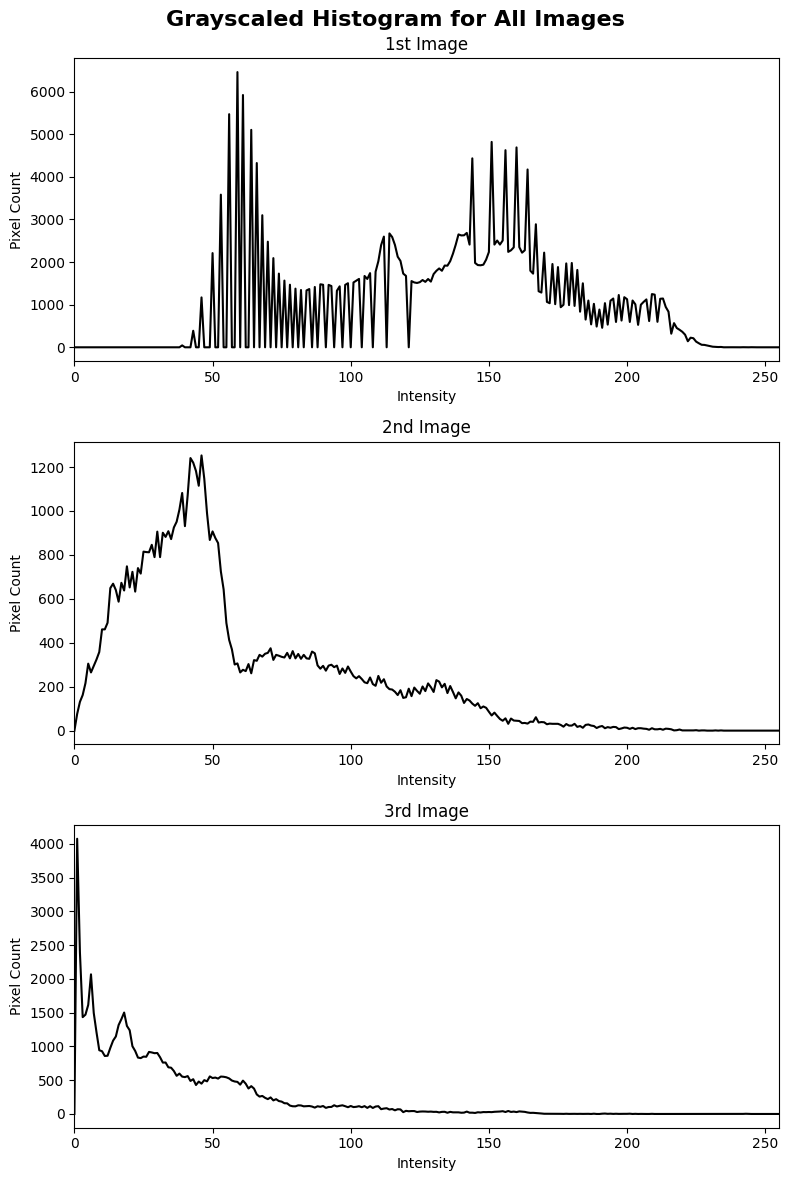

In [5]:
# img1 = cv.imread('/content/drive/MyDrive/PCVK/Image/Lenna_(test_image).png')
# img2 = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
# img3 = cv.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff')

img1 = cv.imread('/content/drive/MyDrive/PCVK/Image/Lenna_(test_image).png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff', cv.IMREAD_GRAYSCALE)
img3 = cv.imread('/content/drive/MyDrive/PCVK/Image/couple.tiff', cv.IMREAD_GRAYSCALE)

# b_hist = np.zeros(256)
# g_hist = np.zeros(256)
# r_hist = np.zeros(256)

# b_img1 = cv.split(img1)[0]
# g_img1 = cv.split(img1)[1]
# r_img1 = cv.split(img1)[2]

# b_img2 = cv.split(img2)[0]
# g_img2 = cv.split(img2)[1]
# r_img2 = cv.split(img2)[2]

# b_img3 = cv.split(img3)[0]
# g_img3 = cv.split(img3)[1]
# r_img3 = cv.split(img3)[2]

# hist_b = np.histogram(b_img1, bins=256, range=(0, 256))
# hist_g = np.histogram(g_img1, bins=256, range=(0, 256))
# hist_r = np.histogram(r_img1, bins=256, range=(0, 256))

# hist_b2 = np.histogram(b_img2, bins=256, range=(0, 256))
# hist_g2 = np.histogram(g_img2, bins=256, range=(0, 256))
# hist_r2 = np.histogram(r_img2, bins=256, range=(0, 256))

# hist_b3 = np.histogram(b_img3, bins=256, range=(0, 256))
# hist_g3 = np.histogram(g_img3, bins=256, range=(0, 256))
# hist_r3 = np.histogram(r_img3, bins=256, range=(0, 256))

# hist1 = [hist_b[0], hist_g[0], hist_r[0]]
# hist2 = [hist_b2[0], hist_g2[0], hist_r2[0]]
# hist3 = [hist_b3[0], hist_g3[0], hist_r3[0]]

hist1 = cv.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv.calcHist([img3], [0], None, [256], [0, 256])


fig, axs = plt.subplots(3, 1, figsize=(8, 12))
# fig.suptitle('RGB Histograms for All Images', fontsize=16, fontweight='bold')
fig.suptitle('Grayscaled Histogram for All Images', fontsize=16, fontweight='bold')

# image_titles = ['1st Image', '2nd Image', '3rd Image']
# colors = ['blue', 'green', 'red']
# channel_titles = ['Blue Channel', 'Green Channel', 'Red Channel']

# for i, (hists, title) in enumerate(zip([hist1, hist2, hist3], image_titles)):
#     for j, (hist, color, ch_title) in enumerate(zip(hists, colors, channel_titles)):
#         axs[i, j].bar(range(256), hist, color=color)
#         axs[i, j].set_title(f'{title} - {ch_title}')
#         axs[i, j].set_xlabel('Intensity')
#         axs[i, j].set_ylabel('Pixel Count')
#         axs[i, j].set_xlim([0, 255])

# plt.tight_layout()
# plt.show()


images = [hist1, hist2, hist3]
titles = ['1st Image', '2nd Image', '3rd Image']

for i, (hist, title) in enumerate(zip(images, titles)):
    axs[i].plot(hist, color='black')
    axs[i].set_title(title)
    axs[i].set_xlabel('Intensity')
    axs[i].set_ylabel('Pixel Count')
    axs[i].set_xlim([0, 255])

plt.tight_layout()
plt.show()

2. Terapkan transformasi brightness dan contrast (linear/log brightness).

o Tentukan nilai b (brightness) dan a (contrast) yang sesuai agar wajah tampak
natural

Enter value of alpha: 1.3
Enter value of beta: 20


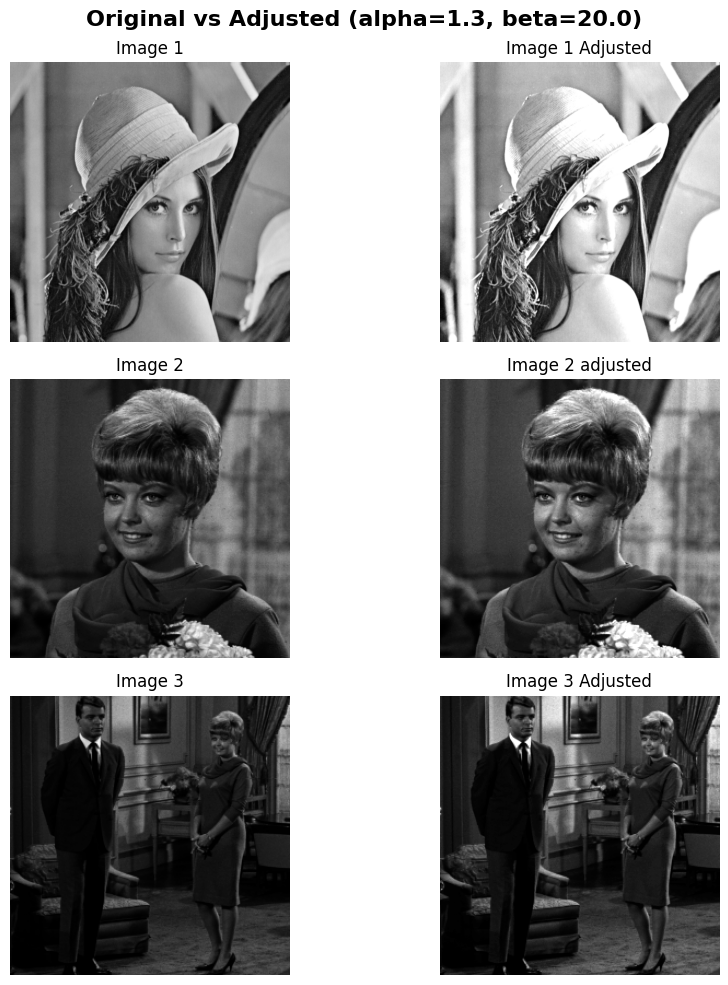

In [7]:
listImg = [img1, img2, img3]

try:
  alpha = float(input("Enter value of alpha: "))
  beta = float(input("Enter value of beta: "))
except ValueError:
  print("Error, not a number")

adjusted_Imglist = []
for i, img in enumerate(listImg):
  adjusted = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
  adjusted_Imglist.append(adjusted)


titles = ['Image 1', 'Image 2', 'Image 3']
title_adj = ['Image 1 Adjusted', 'Image 2 adjusted', 'Image 3 Adjusted']

fig, axs = plt.subplots(len(listImg), 2, figsize=(10, 10))
fig.suptitle(f'Original vs Adjusted (alpha={alpha}, beta={beta})', fontsize=16, fontweight='bold')

for i in range(len(listImg)):
    axs[i, 0].imshow(listImg[i], cmap='gray')
    axs[i, 0].set_title(titles[i])
    axs[i, 0].axis('off')

    axs[i, 1].imshow(adjusted_Imglist[i], cmap='gray')
    axs[i, 1].set_title(title_adj[i])
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

3. Lakukan histogram equalization untuk memperbaiki sebaran kontras.

o Bandingkan hasil visual dan histogram sebelum–sesudah.

4.  Terapkan filter spasial:

o Low-pass filter untuk menghaluskan noise kulit wajah.

o High-pass atau Laplacian filter untuk menajamkan tepi mata dan bibir

5. Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman warna
wajah (bit-depth 4–6 bit), lalu analisis bagaimana efeknya terhadap detail dan ekspresi
wajah.